In [1]:
from model import FFNet, tv_model
from learning import Learn, Selector
from dataset import SKDS, TVDS

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [ ]:
model_params = {'D_in': 28*28, 
                'H': 1024, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'make': 'make_regression',
             'sk_params': {'n_samples': 10000,
                           'n_features': 128,
                           'transform': transforms.Compose(
                                               [transforms.Resize(224),
                                                transforms.ToTensor()])}}

opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.1,.8)}
sched_params = {'factor': .1,
                'patience': 2}


l = Learn(SKDS, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

epoch: 0 of 10, train loss: 0.22555417594488245, val loss: 0.0846959320801155, lr: 0.01
epoch: 1 of 10, train loss: 0.0699126495302371, val loss: 0.09944039534034285, lr: 0.01
epoch: 2 of 10, train loss: 0.04974422464209298, val loss: 0.040416648366646164, lr: 0.01
epoch: 3 of 10, train loss: 0.03763270061493586, val loss: 0.032153085069702984, lr: 0.01
epoch: 4 of 10, train loss: 0.030995828253475945, val loss: 0.05533652503968187, lr: 0.01
epoch: 5 of 10, train loss: 0.025090533565972274, val loss: 0.04975179227119285, lr: 0.005
epoch: 6 of 10, train loss: 0.011343250545918636, val loss: 0.03395420837612695, lr: 0.005
epoch: 7 of 10, train loss: 0.008924363845942451, val loss: 0.033066488833388176, lr: 0.0025
epoch: 8 of 10, train loss: 0.004033695848327069, val loss: 0.03013436991136042, lr: 0.0025
epoch: 9 of 10, train loss: 0.002188250261670776, val loss: 0.028100352082392362, lr: 0.0025
test loss: 0.02140070253451179
y_pred:
tensor([[-12.0309,  12.9050,  -9.6601, -18.4565,  -4.54

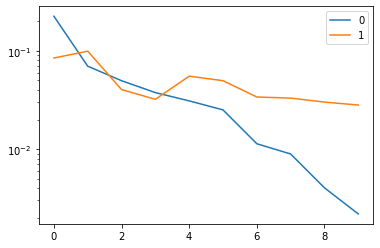

learning time: 0:23:12.067633


In [2]:
model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 10}}

ds_params={'embed': None,
           'train_params': {'dataset': 'MNIST',
                         'tv_params': {'root': './data/',
                                       'train': True,
                                       'download': True,
                                       'transform': transforms.Compose([
                                           transforms.Resize(224),
                                           transforms.ToTensor()]),
                                       'target_transform': None}},
           'test_params': {'dataset': 'MNIST',
                         'tv_params': {'root': './data/',
                                       'train': False,
                                       'download': True,
                                       'transform': transforms.Compose([
                                           transforms.Resize(224),
                                           transforms.ToTensor()]),
                                       'target_transform': None}}}
        
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.8,.2)}
sched_params = {'factor': .5,
                'patience': 1}

l = Learn([TVDS,TVDS], tv_model, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)

In [ ]:
model_params = {'D_in': 28*28, 
                'H': 1024, 
                'D_out': 10, 
                'model_name': 'funnel'}

ds_params={'embed': None,
           'ds_params': {'dataset': 'MNIST',
                         'tv_params': {'root': './data/',
                                       'train': True,
                                       'download': True,
                                       'transform': transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.1307,),(0.3081,))]),
                                       'target_transform': None}}}
                         
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .1,
                'patience': 1}

l = Learn([TVDS], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=128, epochs=10)

In [ ]:
model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 10}}

model_params = {'D_in': 28*28, 
                'H': 1024, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'make': 'make_regression',
             'sk_params': {'n_samples': 10000,
                           'n_features': 128,
                           'transform': transforms.Compose(
                                               [transforms.Resize(224),
                                                transforms.ToTensor()])}}
ds_params={'embed': None,
           'train_params': {'dataset': 'MNIST',
                         'tv_params': {'root': './data/',
                                       'train': True,
                                       'download': True,
                                       'transform': transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.1307,),(0.3081,))]),
                                       'target_transform': None}},
           'test_params': {'dataset': 'MNIST',
                         'tv_params': {'root': './data/',
                                       'train': False,
                                       'download': True,
                                       'transform': transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.1307,),(0.3081,))]),
                                       'target_transform': None}}}